In [3]:
# https://github.com/marybun

# Machine Learning - Curve Fitting

Author: Mary Bun

This notebook provides basic examples of curve fitting in Python, following HW1 in EE 399A, Introduction to Machine Learning for Science and Engineering, a UW course designed by J. Nathan Kutz for Spring 2023.

### 1. Introduction and Overview

The purpose of this notebook is to become familar with curve fitting in regression. Curve fitting is used to fit data to a curve that best represents the underlying pattern of the data, which can then be used to predict other data points. This notebook will explore the basics of curve fitting in Python, such as how to fit a defined model, making initial guesses, how to fit polynomial models, and overfitting.

### 2. Theoretical Background

**Least-Squares** is a commonly used method of finding a line or curve of best-fit. It minimizes the sum of the squared differences between the predicted values and the true values. In this notebook, we will use this method to minimize the Root Mean Squared Error (RMSE) between the data and various models.

**Root Mean Squared Error (RMSE)** is a measure of how accurate a model is to the data. It is calculated by taking the square root of the mean of the squared error (differences) between the predicted values and the true values. The lower the RMSE, the more accurate the model is.

**fmin** is a function in the scipy.optimize module that finds a minimum of a given function when given the function and an initial guess of the coefficients of that function. fmin gives the minimum closest to the initial guess, so it is important to make an initial guess that is close to the global minimum. In our case, the function to be minimized is the RMSE between the predicted and true data. fmin will return the coefficients for the model that will produce the minimum.

**polyfit** creates a polynomial model given the degree and training data.

**polyval** returns the predicted data given the polynomial model and the X values.

### 3. Algorithm Implementation and Visualizations

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fmin
import itertools

In [12]:
# Given data
X=np.arange(0,31)
Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41, 
            40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

We fit the data to the model given by the equation: $f(x) = A\cos(Bx) + Cx + D$

And calculate the RMSE value using the equation described in Section 2: $E = \sqrt{\frac{1}{n}\Sigma_{j=1}^{n}(f(x_j)-y_j)^2}$, where $n$ is the number of data points, $f(x_j)$ are the predicted values (can also be written as $\hat{y_j}$), and $y_j$ are the true values.

In [13]:
# Calculate the RMSE value when fitted to a model Y_hat
def fit_this(A,X,Y):
    Y_hat = A[0]*np.cos(A[1]*X) + A[2]*X + A[3] 
    rmse = np.sqrt( (1/len(X)) * sum((Y-Y_hat)**2) )
    return rmse 

First, we make an initial guess $A0$, which will be used to find the coefficients $A, B, C,$ and $D$ to produce a minimum RMSE.

Optimization terminated successfully.
         Current function value: 2.200234
         Iterations: 372
         Function evaluations: 649
[ -0.21676937 -15.46461846   0.71835302  31.82571934]


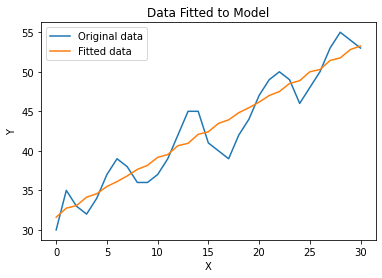

In [14]:
# Make a guess, A0, and find a local minimum given by A
A0 = np.zeros(4)
A = fmin(fit_this,A0,args = (X,Y))
Y_hat = A[0]*np.cos(A[1]*X) + A[2]*X + A[3] 

# Compare the original data Y to the fitted data Y_hat
plt.plot(X,Y, label='Original data')
plt.plot(X,Y_hat, label='Fitted data')
plt.title('Data Fitted to Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Print A, B, C, and D
print(A)

As seen above, the fitted data follows the trend of the original data, but could be more accurate. We can use different coefficients to produce a more accurate model. To do this, we will sweep through the coefficients two at a time, and find which values produce minimum errors.

(0, 1)
(0, 2)
(0, 3)
(1, 2)
(1, 3)
(2, 3)


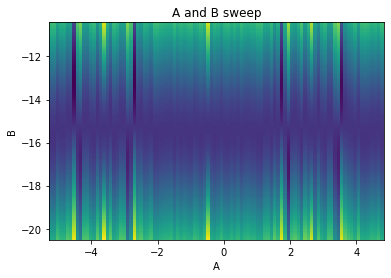

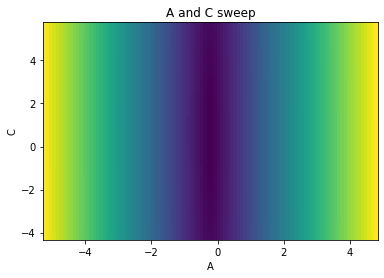

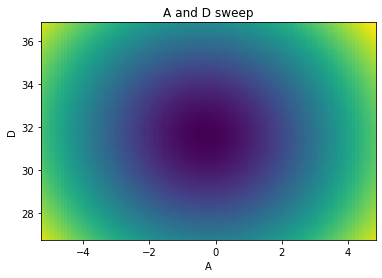

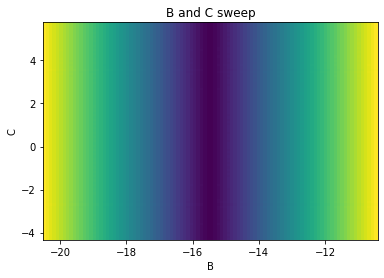

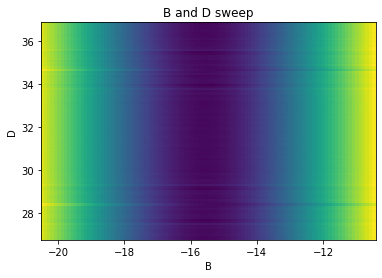

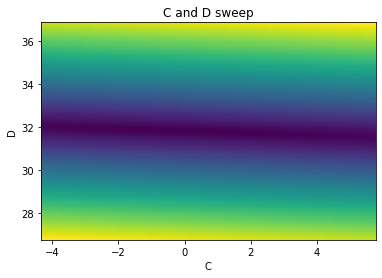

In [8]:
# Using the coefficients obtained previously, increment/decrement them by up to 5
sweep_range = np.linspace(-5,5,100)

idxs = [0, 1, 2, 3]
letters = 'ABCD'
for subset in itertools.combinations(idxs, 2):
    print(subset) # Get every combination of 2 elements from idxs

    # Sweep through 2 coeffient values and calculate the RMSE values
    err_arr = np.zeros((len(sweep_range),len(sweep_range))) 
    for i in np.arange(0,len(sweep_range)): 
        for j in np.arange(0,len(sweep_range)): 
            A_tmp = A.copy()

            A_tmp[subset[0]] += sweep_range[i]
            A_tmp[subset[1]] += sweep_range[j]

            err_arr[i,j] = fit_this(A_tmp,X,Y)

    plt.figure()
    plt.title(letters[subset[0]] + ' and ' + letters[subset[1]] + ' sweep')
    Xs, Ys = np.meshgrid(sweep_range+A[subset[0]],sweep_range+A[subset[1]])
    plt.pcolor(Xs,Ys,err_arr)
    plt.xlabel(letters[subset[0]])
    plt.ylabel(letters[subset[1]])

The color maps above display the RMSE values for swept coefficients. The darker colors indicate a smaller RMSE value. Overall, we observe that the coefficient $C$ has little effect on the RMSE values. $A$ is more sensitive than $B$, and $A$ and $D$ are similarly sensitive. 

To further examine the accuracy of models to our data, we will use models of varying degrees and see how well they fit with the original data. We will do this by using the first 20 original data points as training data, and using the rest as test data. polyfit will create a polynomial model that fits the training data. A good model should follow all the data with little error.

Training Error for 1 degree polynomial is 2.2427493868085384
Test Error for 1 degree polynomial is 3.36363873604787
Training Error for 2 degree polynomial is 2.125539348277377
Test Error for 2 degree polynomial is 8.713651781874946
Training Error for 19 degree polynomial is 0.028351478953633075
Test Error for 19 degree polynomial is 28620435294.80369


c:\Users\mary3\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


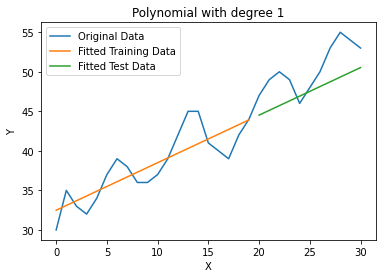

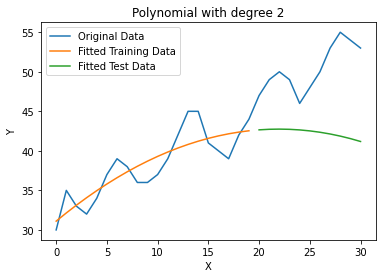

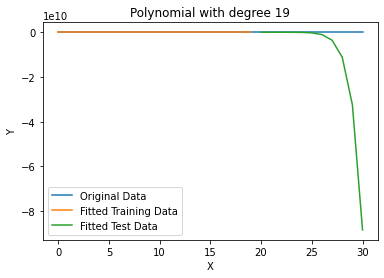

In [9]:
# Train on the first 20 data points
Xtrain = X[:20]
Ytrain = Y[:20] 
# Test the rest of the data points
Xtest = X[20:]
Ytest = Y[20:]

# Fit the data to polynomials and calculate error
poly_err_train = 0
poly_err_test = 0
degs = [1, 2, 19]

for i in degs:
    pfit = np.polyfit(Xtrain,Ytrain,i)
    Yhat_train = np.polyval(pfit,Xtrain)
    Yhat_test = np.polyval(pfit,Xtest)

    poly_err_train = np.sqrt( (1/len(Xtrain)) * sum((Ytrain-Yhat_train)**2) )
    poly_err_test = np.sqrt( (1/len(Xtest)) * sum((Ytest-Yhat_test)**2) )
    print('Training Error for ' + str(i) + ' degree polynomial is ' + str(poly_err_train))
    print('Test Error for ' + str(i) + ' degree polynomial is ' + str(poly_err_test))
    
    plt.figure() 
    plt.plot(X,Y, label='Original Data')
    plt.plot(Xtrain,Yhat_train, label='Fitted Training Data')
    plt.plot(Xtest,Yhat_test, label='Fitted Test Data')
    plt.title('Polynomial with degree ' + str(i))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()


One might assume increasing the degree of the polynomial will give a more accurate model, since more coefficients allow for more flexibility, but with the 19th degree polynomial above, this is not the case. This phenomenon is called **overfitting**. It occurs when a model is too complex and fits the noise of the data, rather than the pattern.

We also observe that the 2nd and 19th degree polynomial models deviate more from the data as X increases. We can bypass this by training the models on the outer data points and testing the middle points. Below, we train the models on the first 10 and last 11 data points, and use the middle 10 points as testing data.

Training Error for 1 degree polynomial is 1.8093693861586486
Test Error for 1 degree polynomial is 2.948751607976006
Training Error for 2 degree polynomial is 1.8092312298141944
Test Error for 2 degree polynomial is 2.935302696288539
Training Error for 19 degree polynomial is 0.22431594626752158
Test Error for 19 degree polynomial is 81.93276635655599


c:\Users\mary3\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


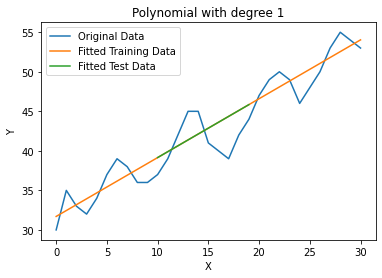

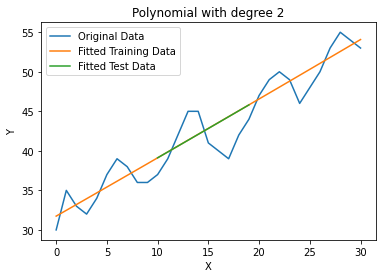

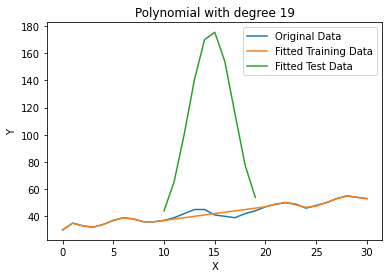

In [10]:
# Train on the first 10 and last 11 data points
Xtrain = np.append(X[:10], X[20:])
Ytrain = np.append(Y[:10], Y[20:])

# Test the middle 10 data points
Xtest = X[10:20]
Ytest = Y[10:20]

# Fit the data to polynomials and calculate error
poly_err_train = 0
poly_err_test = 0
degs = [1, 2, 19]

for i in degs:
    pfit = np.polyfit(Xtrain,Ytrain,i)
    Yhat_train = np.polyval(pfit,Xtrain)
    Yhat_test = np.polyval(pfit,Xtest)

    poly_err_train = np.sqrt( (1/len(Xtrain)) * sum((Ytrain-Yhat_train)**2) )
    poly_err_test = np.sqrt( (1/len(Xtest)) * sum((Ytest-Yhat_test)**2) )
    print('Training Error for ' + str(i) + ' degree polynomial is ' + str(poly_err_train))
    print('Test Error for ' + str(i) + ' degree polynomial is ' + str(poly_err_test))
    
    plt.figure() 
    plt.plot(X,Y, label='Original Data')
    plt.plot(Xtrain,Yhat_train, label='Fitted Training Data')
    plt.plot(Xtest,Yhat_test, label='Fitted Test Data')
    plt.title('Polynomial with degree ' + str(i))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()


We can see that the 2nd degree polynomial fits the trend of the data much more accurately. Additionally, the 1st degree and 2nd degree polynomials are very similar, which implies that a linear line of best-fit is more accurate than a parabolic curve. The 19th degree polynomial has a large increase around X = 15, which is caused by overfitting.

### 4. Summary & Conclusions

Curve fitting is an essential part of data analysis and provides many insights on a dataset, such as the relationships between variables and predictions for future data points. They are also useful in visualizing data, which grants a better understanding of the aforementioned attributes.